In [1]:
#Primer Orden, para f(x,t)
function metodo_euler(f,x0,t0,tf,h)
    n=0
    list_t=[]
    list_x=[]
    while n<=(tf-t0)/h #Esto para obtener un número entero de pasos.
        n=n+1;
    end
    list_t=zeros(n+1);
    list_x=zeros(n+1);
    for i in 1:n+1
        list_t[i]=t0+(i-1)*h;
    end
    list_x[1]=x0
    for i in 1:n
        list_x[i+1]=list_x[i]+h*f(list_x[i],list_t[i]);
    end
    return list_t,list_x,n
end

metodo_euler (generic function with 1 method)

In [2]:
a=2.5

2.5

In [3]:
f(x,t)=-a*x

f (generic function with 1 method)

In [4]:
ME1=metodo_euler(f,1,0,8,1.0)
ME2=metodo_euler(f,1,0,8,0.5)
ME3=metodo_euler(f,1,0,8,0.2)
ME4=metodo_euler(f,1,0,8,0.01)
ME5=metodo_euler(f,2,0,8,1.0)
ME6=metodo_euler(f,2,0,8,0.5)
ME7=metodo_euler(f,2,0,8,0.2)
ME8=metodo_euler(f,2,0,8,0.01)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  7.92, 7.93, 7.94, 7.95, 7.96, 7.97, 7.98, 7.99, 8.0, 8.01], [2.0, 1.95, 1.90125, 1.85372, 1.80738, 1.76219, 1.71814, 1.67518, 1.6333, 1.59247  …  3.91458e-9, 3.81672e-9, 3.7213e-9, 3.62827e-9, 3.53756e-9, 3.44912e-9, 3.3629e-9, 3.27882e-9, 3.19685e-9, 3.11693e-9], 801)

In [5]:
using PyPlot

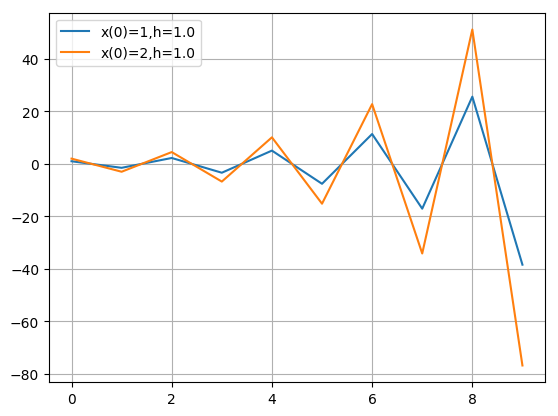

In [6]:
plot(ME1[1],ME1[2],label="x(0)=1,h=1.0")
plot(ME5[1],ME5[2],label="x(0)=2,h=1.0")
grid("on")
legend()
show()

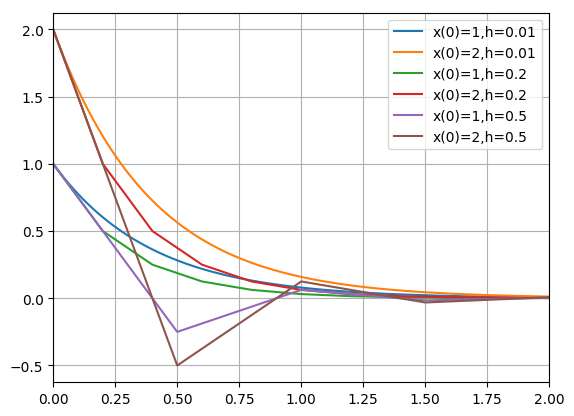

In [7]:
plot(ME4[1],ME4[2],label="x(0)=1,h=0.01")
plot(ME8[1],ME8[2],label="x(0)=2,h=0.01")

plot(ME3[1],ME3[2],label="x(0)=1,h=0.2")
plot(ME7[1],ME7[2],label="x(0)=2,h=0.2")

plot(ME2[1],ME2[2],label="x(0)=1,h=0.5")
plot(ME6[1],ME6[2],label="x(0)=2,h=0.5")

grid("on")
xlim(0,2)
legend()
show()

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.

Modela el oscilador armónico. La solución general es:
$$
x(t)=ACos(\sqrt{k}t+\phi)
$$
de donde se puede derivar para obtener
$$
\dot{x}(t)=-kASin(\sqrt{k}t+\phi)
$$
Así, $x(0)=ACos(\phi)$  y  $\dot{x}(0)=-kASin(\phi)$. 

Es fácil concluir que

$$ A=\sqrt{x(0)^{2}+(\frac{\dot{x}(0)}{k})^{2}}, \phi=arctan(\frac{-\dot{x}(0)}{kx(0)}) $$

De este modo, la solución exacta en términos de las condiciones iniciales $x(0)$ y $x'(0)$ es:
$$
x(t)=\sqrt{x(0)^{2}+(\frac{\dot{x}(0)}{k})^{2}}Cos(\sqrt{k}t+arctan(\frac{-\dot{x}(0)}{kx(0)})
$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

$\dot{u}=\ddot{x}(t)=-kx$ 
se obtiene la ecuaciòn original $\ddot{x}(t)=-kx$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$

In [8]:
#Segundo Orden, para f(x,u,t), con u=dx/dt
function metodo_euler2(f,x0,u0,t0,tf,h)
    g(x,t)=0; #La defino para utilizar el primer método que toma funciones con dos variables
    list_t=metodo_euler(g,0,t0,tf,h)[1]; #Usando el primer método hago una lista de los tiempos
    n=length(list_t) 
    list_x=zeros(n)
    list_u=zeros(n)
    list_x[1]=x0;
    list_u[1]=u0;
    for i in 1:n-1
        list_u[i+1]=list_u[i]+h*f(list_x[i],list_u[i],list_t[i]) #Esta parte es equivalente a resolver du/dt=-kx
        list_x[i+1]=list_x[i]+h*list_u[i]; #Esta parte resuelve dx/dt=u, ya que list_u tiene los valores que toma u.
    end
    return list_t,list_x,list_u,x0,u0
end

metodo_euler2 (generic function with 1 method)

In [9]:
k=1;

In [10]:
h(x,u,t)=-k*x;

In [11]:
ME2_1=metodo_euler2(h,0,1,0,8,0.01)
A=sqrt((ME2_1[4])^2+(ME2_1[5]/k)^2);
phi=atan(-ME2_1[5]/(k*ME2_1[4]));

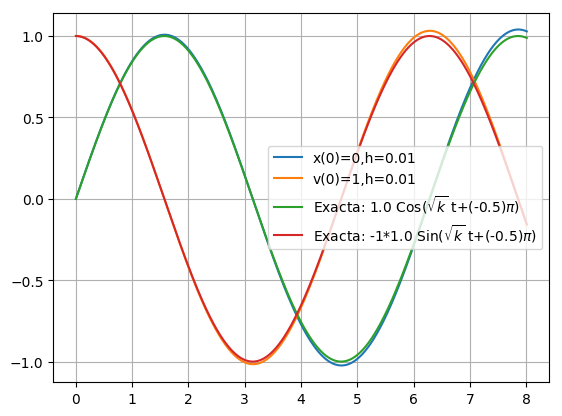

In [30]:
plot(ME2_1[1],ME2_1[2],label="x(0)=0,h=0.01")
plot(ME2_1[1],ME2_1[3],label="v(0)=1,h=0.01")
plot(ME2_1[1],A*cos.(ME2_1[1]+phi),label="Exacta: $A Cos(\$\\sqrt{k}\$ t+($(phi/pi))\$\\pi\$)")
plot(ME2_1[1],-k*A*sin.(ME2_1[1]+phi),label="Exacta: -$k*$A Sin(\$\\sqrt{k}\$ t+($(phi/pi))\$\\pi\$)")
grid("on")
legend()
show()

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [51]:
p(x,t)=(2x-18t)/(1+t);

In [52]:
ME2_2=metodo_euler(p,4,0,3,0.01);

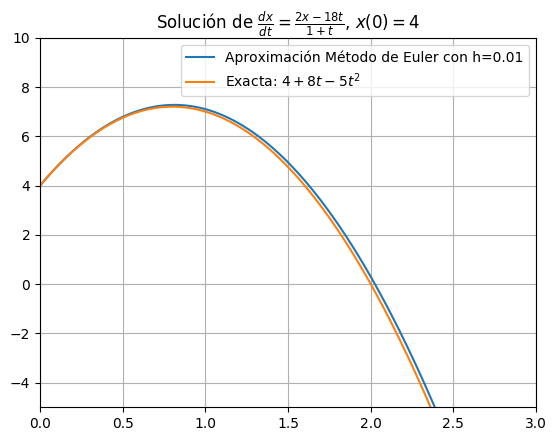

In [63]:
plot(ME2_2[1],ME2_2[2],label="Aproximación Método de Euler con h=0.01")
plot(ME2_2[1],4+8ME2_2[1].-5(ME2_2[1]).^2,label="Exacta: \$4+8t-5t^2\$ ") #\$\\pi\$
grid("on")
xlim(0,3)
ylim(-5,10)
title("Solución de \$\\frac{dx}{dt}=\\frac{2x-18 t}{1+t}\$, \$x(0)=4\$")
legend()
show()